# Monte Carlo algorithms
- Direct sampling

![Monte Carlo](images/monte carlo.png)


- Computation of $\pi$:
$$\frac{A_{\text{circle}}}{A_{\text{square}}} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4} \approx\frac{N_{\text{hits}}}{N_{\text{trials}}}$$


In [1]:
import random
def direct_pi(trials):
    hits = 0
    for i in range(trials):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x**2 + y**2 < 1.0: 
            hits += 1
    return 4.0 * float(hits) / float(trials)
for i in range(1,20):
    print(direct_pi(2**i))

0.0
4.0
3.5
3.25
2.875
3.1875
3.0
3.125
3.1796875
3.15234375
3.134765625
3.138671875
3.13623046875
3.147216796875
3.1390380859375
3.13885498046875
3.1346435546875
3.1412200927734375
3.1429443359375


# Markov Chain / Metropolis algorithm

TODO picture
- random walk on domain. If step would lead to moving out of the domain, move is rejected. The current position is recounted.


In [2]:
def markov_pi(trials = 4000, delta = 0.1, x = 1.0, y = 1.0):
    n_hits = 0
    for i in range(trials):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return 4.0 * float(n_hits) / float(trials)
for i in range(1,20):
    print(markov_pi(trials = 2**i))

0.0
0.0
0.0
0.5
0.625
1.5625
1.0
2.328125
2.640625
2.203125
3.26171875
3.0869140625
3.11279296875
3.1474609375
3.0224609375
3.110595703125
3.125885009765625
3.172576904296875
3.1473007202148438


# Pebble Game
- $3\times3$ grid
- Pebble is on one certain point (state:a, b, c,...) and can move in 4 directions (it must remain in grid)
- a: upper right corner (1,3)
- $p(a \rightarrow b):$ algorithmic transition probability from a to b
- $p(a \rightarrow a) + p(a \rightarrow b) + p(a \rightarrow c) = 1$
- $\pi_a:$ probability of being in state a
- $\pi_a = \pi_a p(a \rightarrow a) + \pi_b p(b \rightarrow a) + \pi_c p(c \rightarrow a)$
- $\Rightarrow \pi_a p(a \rightarrow b) + \pi_a p(a \rightarrow c) = \pi_b p(b \rightarrow a) + \pi_c p(c \rightarrow a):$ Global balance condition
- Detailed balance condition: $\pi_a p(a \rightarrow b) = \pi_b p(b \rightarrow a); \pi_a p(a \rightarrow c) = \pi_c p(c \rightarrow a)$
- We want: $\pi_a = \pi_b = \pi_c = \dots$
- $\Rightarrow p(a \rightarrow b) = p(b \rightarrow a); \dots$
- Example a: $p(a \rightarrow a) = \frac{1}{2}; p(a \rightarrow b) = p(a \rightarrow c) = \frac{1}{4}$

## Inhomogeneous 3x3 Pebble game
- $\pi_i$ are given, not homogeneous
- Metropolis acceptance probability: $p(a \rightarrow b) = \min(1, \frac{\pi_b}{\pi_a})$

## Convergance of 3x3 Pebble game

In [3]:
# Neighbor configuration for pebble games
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
            [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
            [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

In [4]:
def pebble_basic(start = 8, t_max = 4):
    site = start
    t = 0
    yield site
    while t < t_max:
        t += 1
        site = neighbor[site][random.randint(0, 3)]
        yield site
for site in pebble_basic(start = 2, t_max = 10):
    print(site)

2
2
2
5
5
4
7
4
5
4
7


In [5]:
def pebble_basic_multirun(runs = 25600, start = 8, t_max = 4):
    for run in range(runs):
        site = start
        t = 0
        while t < t_max: 
            t += 1
            site = neighbor[site][random.randint(0, 3)]
        yield site
# Adjust number of timesteps and the starting site
for site in pebble_basic_multirun(runs = 10, start = 8):
    print(site)

8
7
8
1
8
5
1
6
8
1


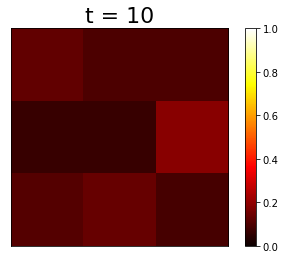

In [6]:
import numpy as np
import matplotlib.pyplot as plt
    
def pebble_histogram(list_vec, t_max):
    xvec = {0:3, 1:2, 2:1, 3:3, 4:2, 5:1, 6:3, 7:2, 8:1} 
    yvec = {0:1, 1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3} 
    x = [xvec[k] for k in list_vec]
    y = [yvec[k] for k in list_vec]

    plt.xticks([])
    plt.yticks([])
    H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
               range=[[1,3],[1,3]], normed=True)
    H /= np.sum(H)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    plt.imshow(H, extent=extent, interpolation='nearest', vmin=0.0, vmax=1.0)
    plt.set_cmap('hot')
    plt.colorbar()
    plt.title('t = '+str(t_max),fontsize=22)
    plt.show()

list_vec = []
# Adjust number of runs and timesteps
t_max = 10
runs = 100
for site in pebble_basic_multirun(runs = runs, start = 8, t_max = t_max):
    list_vec.append(site)
pebble_histogram(list_vec, t_max)

# Transfer Matrix Method
- for $3\times3$ pebble game
- $\pi_i$ as vector: $\pi^t = \begin{pmatrix}\pi_0^t\\ \pi_1^t\\ \vdots\\ \pi_8^t\end{pmatrix}$
- Transfer Matrix **A**:
$\begin{bmatrix}
p(0 \rightarrow 0) & p(1 \rightarrow 0) & \ldots & p(8 \rightarrow 0)\\
p(0 \rightarrow 1) & \ddots &  & \vdots \\
\vdots & & \ddots & \vdots \\
p(0 \rightarrow 8) & \dots & \dots & p(8 \rightarrow 8) \\
\end{bmatrix}$
- $\pi^{t+1} = \mathbf{A} \pi^t$
- $\pi^t = \mathbf{A}^t \pi^0$

In [7]:
# Construct transfer matrix
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25

def pebble_transfer():
    # Initial position
    position = np.zeros(9)
    position[8] = 1.0
    # Iterations
    for t in range(42):
        yield position
        position = np.dot(transfer, position)

for t, pos in enumerate(pebble_transfer()):
    print(t, ' ',["%0.5f" % i for i in pos])

0   ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '1.00000']
1   ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.25000', '0.00000', '0.25000', '0.50000']
2   ['0.00000', '0.00000', '0.06250', '0.00000', '0.12500', '0.18750', '0.06250', '0.18750', '0.37500']
3   ['0.00000', '0.04688', '0.07812', '0.04688', '0.09375', '0.18750', '0.07812', '0.18750', '0.28125']
4   ['0.02344', '0.05469', '0.09766', '0.05469', '0.11719', '0.16016', '0.09766', '0.16016', '0.23438']
5   ['0.03906', '0.07324', '0.10254', '0.07324', '0.10742', '0.15234', '0.10254', '0.15234', '0.19727']
6   ['0.05615', '0.08057', '0.10767', '0.08057', '0.11279', '0.13989', '0.10767', '0.13989', '0.17480']
7   ['0.06836', '0.08929', '0.10895', '0.08929', '0.11023', '0.13379', '0.10895', '0.13379', '0.15735']
8   ['0.07883', '0.09421', '0.11024', '0.09421', '0.11154', '0.12758', '0.11024', '0.12758', '0.14557']
9   ['0.08652', '0.09871', '0.11057', '0.09871', '0.11089', '0.1

# Equilibrium and Decay
- Equilibrium Probability Vector: $\tilde{\pi} = \begin{pmatrix}1/9 \\ \vdots \\ 1/9\end{pmatrix}$
- $\mathbf{A} \tilde{\pi} = \lambda_1 \tilde{\pi}$, when $\lambda_1 = 1$
- Second eigenvalue is slowest decay: $\lambda_2 = 0.75$

- Decay: $0.75^{-t} \Rightarrow \mathrm{e}^{-t/\tau}$, where $\tau \approx 3.476$, $\tau$ is the correlation time

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(transfer)

for iter in range(9):
    print('Eigenvalue: ', eigenvalues[iter])
    if(np.isclose(eigenvalues[iter], 1.0)):
        print('Equilibrium vector:')
        for i in range(9):
           print(eigenvectors[i][iter])

Eigenvalue:  -0.5
Eigenvalue:  -1.17928095907e-17
Eigenvalue:  1.0
Equilibrium vector:
-0.333333333333
-0.333333333333
-0.333333333333
-0.333333333333
-0.333333333333
-0.333333333333
-0.333333333333
-0.333333333333
-0.333333333333
Eigenvalue:  0.75
Eigenvalue:  0.5
Eigenvalue:  0.25
Eigenvalue:  2.52453377538e-18
Eigenvalue:  0.25
Eigenvalue:  0.75
